In [1]:
# Install tensorflow 

import sys
print(sys.executable)
!"{sys.executable}" -m pip install --user tensorflow-cpu

C:\ProgramData\anaconda3\python.exe


In [11]:
# Alexander LUI Neural Network HW5
#
# Import Libraries

import pandas as pd
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import seaborn as sns


In [3]:
import sys
print(sys.executable)

C:\ProgramData\anaconda3\python.exe


In [4]:
# Input Churn_dataset

data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Data Exploration: Understanding the dataset and key features

data.shape


(7043, 21)

In [6]:
# The raw data contains 7043 rows (customers) and 21 columns (features,) which is exactly what is given in HW description 

data.info()

# numeric
data.describe()
# categorical 
data.describe(include='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [9]:
# churn count 
data['Churn'].value_counts()




Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [10]:
# churn percentage
data['Churn'].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

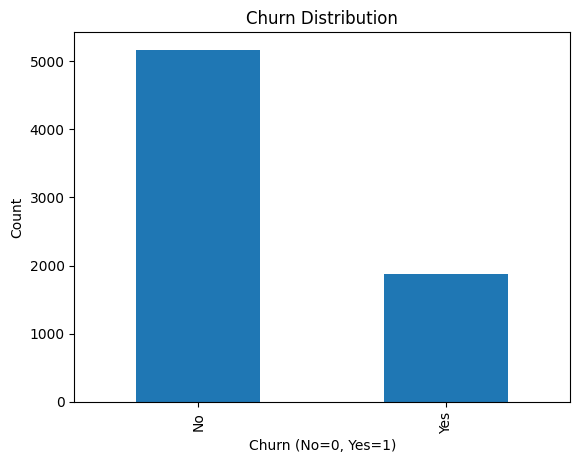

In [12]:
# plot bar chart
data['Churn'].value_counts().plot(kind='bar')
plt.title("Churn Distribution")
plt.xlabel("Churn (No=0, Yes=1)")
plt.ylabel("Count")
plt.show()

In [13]:
# Data Pre-processing 

# check for NaN and None

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
# TotalCharges should be float64
# we must have some empty spaces in this column

data[pd.to_numeric(data['TotalCharges'], errors='coerce').isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [18]:
# we have 11 rows with missing TotalCharges

#Convert TotalCharges to numeric 

data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

#check # NaN values again 
data['TotalCharges'].isna().sum()

np.int64(0)

In [19]:
# impute NaN with median 
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())

In [17]:
# Drop useless columns
data = data.drop(columns=['customerID'])

In [20]:
#Encode target "churn" (Yes/No to 1/0
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

In [28]:
# One-hot encode categorical columns

cat_cols = data.select_dtypes(include=['object']).columns

data = pd.get_dummies(data, columns=cat_cols, drop_first=False)

In [29]:
# print out the pre-processed file before modeling 

data.to_csv("preprocessed_churn.csv")
data.head(10)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
5,0,8,99.65,820.50,1,False,False,False,True,False,...,False,True,False,True,False,False,True,False,True,False
6,0,22,89.10,1949.40,0,True,False,True,True,False,...,False,True,False,False,False,False,True,True,False,False
7,0,10,29.75,301.90,0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
8,0,28,104.80,3046.05,1,False,True,False,True,False,...,False,True,False,True,False,False,True,False,True,False
9,0,62,56.15,3487.95,0,True,False,True,True,False,...,False,False,False,False,True,False,False,False,False,False


In [30]:
data.tail(10)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
7033,0,38,69.50,2625.25,0,True,False,False,True,False,...,False,False,False,False,False,False,True,True,False,False
7034,0,67,102.95,6886.25,1,False,False,False,True,False,...,False,True,False,False,False,False,True,True,False,False
7035,0,19,78.70,1495.10,0,True,False,False,True,False,...,False,True,False,False,False,False,True,False,False,False
7036,0,12,60.65,743.30,0,False,False,False,False,True,...,False,True,False,True,True,False,False,False,True,False
7037,0,72,21.15,1419.40,0,False,False,False,True,False,...,True,False,True,False,False,True,True,False,False,False
7038,0,24,84.80,1990.50,0,True,True,True,True,False,...,False,True,False,True,True,False,True,False,False,True
7039,0,72,103.20,7362.90,0,False,True,True,True,False,...,False,True,False,True,True,False,True,True,False,False
7040,0,11,29.60,346.45,0,False,True,True,False,True,...,False,False,False,False,False,False,True,False,True,False
7041,1,4,74.40,306.60,1,True,True,False,True,False,...,False,False,False,False,False,False,True,False,False,True
7042,0,66,105.65,6844.50,0,True,False,False,True,False,...,False,True,False,True,False,True,True,False,False,False


In [31]:
# convert all boolean to integers before modeling 

bool_cols = data.select_dtypes(include=['bool']).columns
data[bool_cols] = data[bool_cols].astype(int)

data.head(10)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
5,0,8,99.65,820.50,1,0,0,0,1,0,...,0,1,0,1,0,0,1,0,1,0
6,0,22,89.10,1949.40,0,1,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
7,0,10,29.75,301.90,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
8,0,28,104.80,3046.05,1,0,1,0,1,0,...,0,1,0,1,0,0,1,0,1,0
9,0,62,56.15,3487.95,0,1,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0


In [32]:

data.tail(10)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
7033,0,38,69.50,2625.25,0,1,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
7034,0,67,102.95,6886.25,1,0,0,0,1,0,...,0,1,0,0,0,0,1,1,0,0
7035,0,19,78.70,1495.10,0,1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
7036,0,12,60.65,743.30,0,0,0,0,0,1,...,0,1,0,1,1,0,0,0,1,0
7037,0,72,21.15,1419.40,0,0,0,0,1,0,...,1,0,1,0,0,1,1,0,0,0
7038,0,24,84.80,1990.50,0,1,1,1,1,0,...,0,1,0,1,1,0,1,0,0,1
7039,0,72,103.20,7362.90,0,0,1,1,1,0,...,0,1,0,1,1,0,1,1,0,0
7040,0,11,29.60,346.45,0,0,1,1,0,1,...,0,0,0,0,0,0,1,0,1,0
7041,1,4,74.40,306.60,1,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
7042,0,66,105.65,6844.50,0,1,0,0,1,0,...,0,1,0,1,0,1,1,0,0,0


In [34]:
# split features and target into X and Y
# split training and test sets

from sklearn.model_selection import train_test_split

X = data.drop('Churn', axis=1)
y = data['Churn']

xtrain, xtest, ytrain, ytest = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [36]:
# scaling features 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [37]:
# Modeling 


input_dim = xtrain.shape[1]   # number of features after encoding

model = Sequential()
model.add(Dense(16, input_dim=input_dim, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(
    xtrain, ytrain,
    batch_size=50,
    epochs=100,
    validation_split=0.2,
    verbose=1
)

Epoch 1/100


C:\Users\luijo\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7588 - loss: 0.4834 - val_accuracy: 0.7764 - val_loss: 0.4597
Epoch 2/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7919 - loss: 0.4319 - val_accuracy: 0.7755 - val_loss: 0.4483
Epoch 3/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7992 - loss: 0.4225 - val_accuracy: 0.7764 - val_loss: 0.4450
Epoch 4/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7990 - loss: 0.4172 - val_accuracy: 0.7791 - val_loss: 0.4426
Epoch 5/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8054 - loss: 0.4128 - val_accuracy: 0.7835 - val_loss: 0.4435
Epoch 6/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8063 - loss: 0.4094 - val_accuracy: 0.7853 - val_loss: 0.4394
Epoch 7/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8105 - loss: 0.4065 - val_accuracy: 0.7897 - val_loss: 0.4371
Epoch 8/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8099 - loss: 0.4044 - val_accuracy: 0.7870 - val_loss: 0.4

In [41]:
# Accuracy is only at 84% 

# let's compare 16-32 model and 64-32 model

# set up function 

def build_model(hidden1, hidden2, input_dim):
    model = Sequential()
    model.add(Dense(hidden1, activation='relu', input_dim=input_dim))
    model.add(Dense(hidden2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # binary output

    model.compile(
        loss='binary_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )
    return model
    
# Train the 16-32 model

input_dim = xtrain.shape[1]

model_16_32 = build_model(16, 32, input_dim)

history_16_32 = model_16_32.fit(
    xtrain, ytrain,
    epochs=100,
    batch_size=50,
    validation_split=0.2,
    verbose=1
)

test_loss_16_32, test_acc_16_32 = model_16_32.evaluate(xtest, ytest, verbose=0)
print(f"16-32 model -> Test Accuracy: {test_acc_16_32:.4f}, Test Loss: {test_loss_16_32:.4f}")


Epoch 1/100


C:\Users\luijo\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7508 - loss: 0.5042 - val_accuracy: 0.7782 - val_loss: 0.4622
Epoch 2/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7905 - loss: 0.4383 - val_accuracy: 0.7853 - val_loss: 0.4497
Epoch 3/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7979 - loss: 0.4267 - val_accuracy: 0.7791 - val_loss: 0.4464
Epoch 4/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8074 - loss: 0.4185 - val_accuracy: 0.7862 - val_loss: 0.4456
Epoch 5/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8083 - loss: 0.4136 - val_accuracy: 0.7853 - val_loss: 0.4453
Epoch 6/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8090 - loss: 0.4100 - val_accuracy: 0.7897 - val_loss: 0.4472
Epoch 7/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8114 - loss: 0.4083 - val_accuracy: 0.7888 - val_loss: 0.4440
Epoch 8/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8134 - loss: 0.4049 - val_accuracy: 0.7879 - val_loss: 0.4

In [42]:

# Train the 64-32 model

model_64_32 = build_model(64, 32, input_dim)

history_64_32 = model_64_32.fit(
    xtrain, ytrain,
    epochs=100,
    batch_size=50,
    validation_split=0.2,
    verbose=1
)

test_loss_64_32, test_acc_64_32 = model_64_32.evaluate(xtest, ytest, verbose=0)
print(f"64-32 model -> Test Accuracy: {test_acc_64_32:.4f}, Test Loss: {test_loss_64_32:.4f}")


Epoch 1/100


C:\Users\luijo\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7815 - loss: 0.4560 - val_accuracy: 0.7853 - val_loss: 0.4459
Epoch 2/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8076 - loss: 0.4165 - val_accuracy: 0.7817 - val_loss: 0.4433
Epoch 3/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8103 - loss: 0.4089 - val_accuracy: 0.7897 - val_loss: 0.4377
Epoch 4/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8130 - loss: 0.4023 - val_accuracy: 0.7915 - val_loss: 0.4412
Epoch 5/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8167 - loss: 0.3979 - val_accuracy: 0.7941 - val_loss: 0.4440
Epoch 6/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8143 - loss: 0.3955 - val_accuracy: 0.7950 - val_loss: 0.4393
Epoch 7/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8207 - loss: 0.3912 - val_accuracy: 0.7906 - val_loss: 0.4410
Epoch 8/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8232 - loss: 0.3880 - val_accuracy: 0.7933 - val_loss: 0.4

In [43]:
# Compare between two models

print("=== Model Comparison ===")
print(f"16-32 model -> Test Accuracy: {test_acc_16_32:.4f}, Test Loss: {test_loss_16_32:.4f}")
print(f"64-32 model -> Test Accuracy: {test_acc_64_32:.4f}, Test Loss: {test_loss_64_32:.4f}")

=== Model Comparison ===
16-32 model -> Test Accuracy: 0.7700, Test Loss: 0.4840
64-32 model -> Test Accuracy: 0.7537, Test Loss: 0.6979


In [45]:
# Add early stopping to 16-32 model (better model) to avoid overfitting
# Let's see if we get better accuracy


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Build 16–32 model
model_es = Sequential()
model_es.add(Dense(16, input_dim=xtrain.shape[1], activation='relu'))
model_es.add(Dense(32, activation='relu'))
model_es.add(Dense(1, activation='sigmoid'))

model_es.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Early Stopping callback
es = EarlyStopping(
    monitor='val_loss',      # watch validation loss
    patience=10,             # stop if no improvement for 10 epochs
    restore_best_weights=True
)

# Train model with EarlyStopping
history_es = model_es.fit(
    xtrain, ytrain,
    epochs=100,
    batch_size=50,
    validation_split=0.2,
    callbacks=[es],
    verbose=1
)

# Evaluate on test set
test_loss_es, test_acc_es = model_es.evaluate(xtest, ytest, verbose=0)
print(f"16–32 + EarlyStopping -> Test Accuracy: {test_acc_es:.4f}, Test Loss: {test_loss_es:.4f}")

# Show actual number of epochs run
print("Epochs run:", len(history_es.history['loss']))


Epoch 1/100


C:\Users\luijo\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7209 - loss: 0.5277 - val_accuracy: 0.7720 - val_loss: 0.4723
Epoch 2/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7908 - loss: 0.4422 - val_accuracy: 0.7817 - val_loss: 0.4565
Epoch 3/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8043 - loss: 0.4269 - val_accuracy: 0.7791 - val_loss: 0.4535
Epoch 4/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8072 - loss: 0.4198 - val_accuracy: 0.7844 - val_loss: 0.4495
Epoch 5/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8041 - loss: 0.4158 - val_accuracy: 0.7879 - val_loss: 0.4449
Epoch 6/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8083 - loss: 0.4108 - val_accuracy: 0.7862 - val_loss: 0.4436
Epoch 7/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8101 - loss: 0.4090 - val_accuracy: 0.7888 - val_loss: 0.4422
Epoch 8/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8101 - loss: 0.4050 - val_accuracy: 0.7844 - val_loss: 0.4

In [46]:
# Model Evaluation

# Evaluate test metrics
print("Test Performance")
print(f"Accuracy: {test_acc_es:.4f}")
print(f"Loss: {test_loss_es:.4f}")

Test Performance
Accuracy: 0.7913
Loss: 0.4276


In [47]:
# Predict probabilities
y_pred_prob = model_es.predict(xtest)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [52]:
# Convert probabilities to 0/1 predictions (threshold = 0.5)
y_pred = (y_pred_prob > 0.5).astype(int)

# Confusion matrix
print("\nConfusion Matrix")
cm = confusion_matrix(ytest, y_pred)
print(cm)



Confusion Matrix
[[914 121]
 [173 201]]


In [51]:
# Classification report (precision, recall, f1)
print("\n Classification Report")
print(classification_report(ytest, y_pred))



 Classification Report
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1035
           1       0.62      0.54      0.58       374

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409

